<a href="https://colab.research.google.com/github/shirafuji/keras_sample/blob/master/mnist_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#mnist_sample
google colaboratoryを利用してmnistを学習するsample codeです。

In [13]:
!apt-get install lshw

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libpci3 pciutils usbutils
The following NEW packages will be installed:
  libpci3 lshw pciutils usbutils
0 upgraded, 4 newly installed, 0 to remove and 28 not upgraded.
Need to get 721 kB of archives.
After this operation, 2,870 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libpci3 amd64 1:3.5.2-1ubuntu1.1 [24.1 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 lshw amd64 02.18-0.1ubuntu6.18.04.1 [231 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 pciutils amd64 1:3.5.2-1ubuntu1.1 [257 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic/main amd64 usbutils amd64 1:007-4build1 [208 kB]
Fetched 721 kB in 0s (3,096 kB/s)
Selecting previously unselected package libpci3:amd64.
(Reading database ... 132681 files and directories currently install

In [14]:
	!lshw

7c05648d2a27
    description: Computer
    width: 64 bits
    capabilities: smp vsyscall32
  *-core
       description: Motherboard
       physical id: 0
     *-memory
          description: System memory
          physical id: 0
          size: 12GiB
     *-cpu
          product: Intel(R) Xeon(R) CPU @ 2.30GHz
          vendor: Intel Corp.
          physical id: 1
          bus info: cpu@0
          width: 64 bits
          capabilities: fpu fpu_exception wp vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp x86-64 constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 avx2 smep bmi2 erms invpcid xsaveopt arat md_clear arch_capabilities
     *-pci
          description: Host bridge
          product: 440FX - 82441FX PMC [

GPUを認識しているかの確認

In [15]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
# 使用するライブラリのインポート
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, InputLayer
from keras.optimizers import RMSprop

import matplotlib.pyplot as plt

## シンプルなニューラルネットワーク

In [17]:
# mnistデータの読み込み(x:訓練, y:正解)
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [0]:
# 入力データの加工
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)


In [0]:
# 文字列データをfloat型に変換
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# 0~255までの数値を0~1に変換
x_train /= 255
x_test /= 255

In [0]:
# 正解データの加工(1と0を用いた配列に変換)
y_train = keras.utils.to_categorical(y_train, 10)
y_test  = keras.utils.to_categorical(y_test, 10)

In [21]:
print("x_train.shape(学習用の画像データ) : ", x_train.shape)
print("y_train_shape(学習用の正解データ) : ", y_train.shape)
print("x_test.shape(検証用の画像データ) : ", x_test.shape)
print("y_test.shape(検証用の正解データ) : ", y_test.shape)

x_train.shape(学習用の画像データ) :  (60000, 784)
y_train_shape(学習用の正解データ) :  (60000, 10)
x_test.shape(検証用の画像データ) :  (10000, 784)
y_test.shape(検証用の正解データ) :  (10000, 10)


In [0]:
# モデルの構築
model = Sequential()
model.add(InputLayer(input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

# モデルをコンパイルする
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [23]:
# 学習
epochs = 20
batch_size = 128
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.6112 - acc: 0.8482 - val_loss: 0.3455 - val_acc: 0.9072
Epoch 2/20
60000/60000 [==============================] - 2s 32us/step - loss: 0.3317 - acc: 0.9082 - val_loss: 0.3013 - val_acc: 0.9170
Epoch 3/20
60000/60000 [==============================] - 2s 32us/step - loss: 0.3022 - acc: 0.9162 - val_loss: 0.2877 - val_acc: 0.9207
Epoch 4/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.2886 - acc: 0.9192 - val_loss: 0.2784 - val_acc: 0.9227
Epoch 5/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.2803 - acc: 0.9220 - val_loss: 0.2736 - val_acc: 0.9249
Epoch 6/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.2749 - acc: 0.9241 - val_loss: 0.2714 - val_acc: 0.9241
Epoch 7/20
60000/60000 [==============================] - 2s 32us/step - loss: 0.2705 - acc: 0.9246 - val_loss: 0.2688 - val_acc

In [24]:
# 学習結果
score = model.evaluate(x_test, y_test, verbose=1)
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 0s 46us/step

Test loss: 0.2697074157714844
Test accuracy: 0.9285


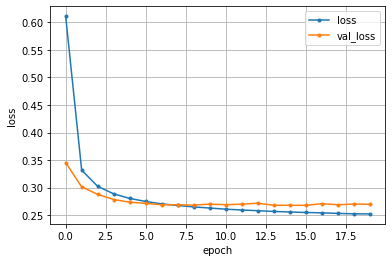

In [25]:
# 学習経過の可視化
loss     = history.history['loss']
val_loss = history.history['val_loss']

nb_epoch = len(loss)
plt.plot(range(nb_epoch), loss,     marker='.', label='loss')
plt.plot(range(nb_epoch), val_loss, marker='.', label='val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 畳み込みニューラルネットワーク

In [0]:
import tensorflow as tf
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, InputLayer, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import RMSprop

import matplotlib.pyplot as plt

In [27]:
# データの読み込み
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [28]:
# 入力データの加工

## データを float 型に変換
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')
## 正規化
x_train = x_train / 255
x_test = x_test / 255
## reshape(ミニバッチサイズ、横幅、縦幅、チャネル数に)
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))


## 正解データの加工
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
y_train = y_train.reshape((-1, 10))
y_test = y_test.reshape((-1, 10))

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)


In [0]:
# モデルの構築

model = Sequential()

## 畳み込み層
model.add(
    Conv2D(
        filters=32,
        input_shape=(28, 28, 1),
        kernel_size=(3, 3),
        strides=(1, 1),
        padding='same',
        activation='relu'
    )
)
## プーリング層
model.add(MaxPooling2D(pool_size=(2,2)))
## ドロップアウト層
model.add(Dropout(0.25))
## Flattenレイヤー
model.add(Flatten())
## 全結合層
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
# モデルをコンパイルする
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [30]:
# 学習
epochs = 20
batch_size = 128
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 102us/step - loss: 0.2513 - acc: 0.9222 - val_loss: 0.0755 - val_acc: 0.9757
Epoch 2/20
60000/60000 [==============================] - 6s 92us/step - loss: 0.0868 - acc: 0.9745 - val_loss: 0.0510 - val_acc: 0.9826
Epoch 3/20
60000/60000 [==============================] - 6s 92us/step - loss: 0.0633 - acc: 0.9808 - val_loss: 0.0449 - val_acc: 0.9844
Epoch 4/20
60000/60000 [==============================] - 6s 93us/step - loss: 0.0521 - acc: 0.9841 - val_loss: 0.0381 - val_acc: 0.9870
Epoch 5/20
60000/60000 [==============================] - 6s 92us/step - loss: 0.0444 - acc: 0.9868 - val_loss: 0.0439 - val_acc: 0.9853
Epoch 6/20
60000/60000 [==============================] - 6s 92us/step - loss: 0.0383 - acc: 0.9887 - val_loss: 0.0370 - val_acc: 0.9880
Epoch 7/20
60000/60000 [==============================] - 6s 92us/step - loss: 0.0346 - acc: 0.9898 - val_loss: 0.0348 - val_ac

In [31]:
# モデルの評価
score = model.evaluate(x_test, y_test, verbose=1)
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 1s 80us/step

Test loss: 0.041896996196222606
Test accuracy: 0.9876


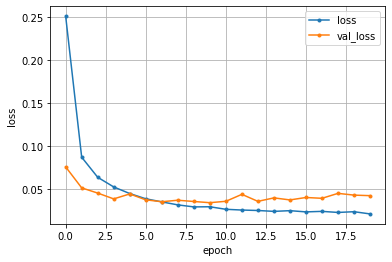

In [32]:
# 学習経過の可視化
loss     = history.history['loss']
val_loss = history.history['val_loss']

nb_epoch = len(loss)
plt.plot(range(nb_epoch), loss,     marker='.', label='loss')
plt.plot(range(nb_epoch), val_loss, marker='.', label='val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()